In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
from math import sqrt
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import mannwhitneyu

390.48

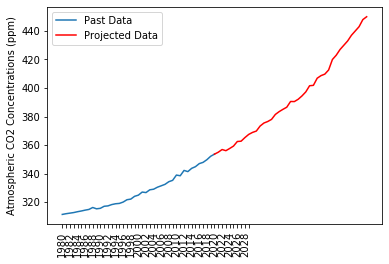

In [3]:
#import data on atmospheric carbon dioxide concentrations 
co2 = pd.read_excel("co2ppm.xlsx")

y1 = co2['co2_ppm'].loc[:40]
y2 = co2['co2_ppm'].loc[40:]
#make plot 
plt.plot(co2['co2_ppm'].loc[:40], label="Past Data")
plt.plot(co2['co2_ppm'].loc[40:], label="Projected Data", color='red')
plt.xticks(np.arange(50), range(1980, 2030), rotation=90)
ax=plt.gca()
[label.set_visible(False) for (index,label) in enumerate(ax.xaxis.get_ticklabels()) if index % 2 != 0]
plt.legend(loc="upper left")
plt.ylabel("Atmospheric CO2 Concentrations (ppm)")
annual_co2 = co2.set_index('Year')

np.percentile(annual_co2['co2_ppm'], 75)

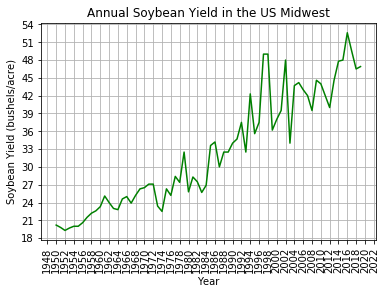

In [4]:
#data on soybean yields 
soy_yield = pd.read_excel("annual_midwest_soybean_yield.xlsx")

#soy_yield.plot(x ='Year', y='Soybean Yield (bushels/acre)', title = "Annual Soybean Yield in the US Midwest", kind = 'line')
#annual_soy_yield = soy_yield.set_index('Year')

tick_spacing = 2
fig, ax = plt.subplots(1,1)
ax.plot(soy_yield['Year'], soy_yield['Soybean Yield (bushels/acre)'], color='green')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Year')
tick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('Soybean Yield (bushels/acre)')
plt.xticks(rotation=90)
ax.set_title("Annual Soybean Yield in the US Midwest")
plt.grid()
plt.show()

In [5]:
#calculations for data summary table
np.percentile(soy_yield['Soybean Yield (bushels/acre)'], 75)

41.5

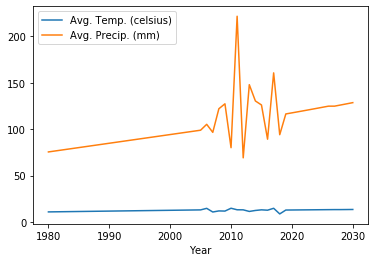

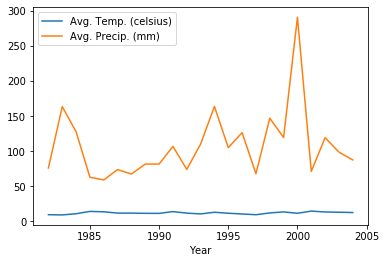

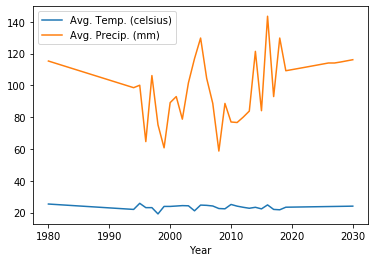

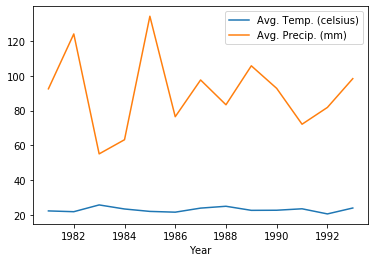

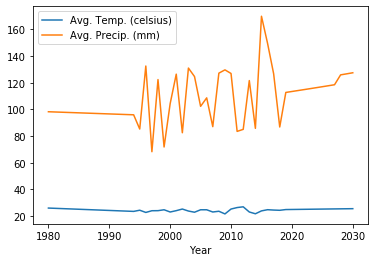

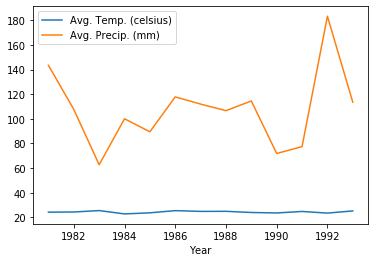

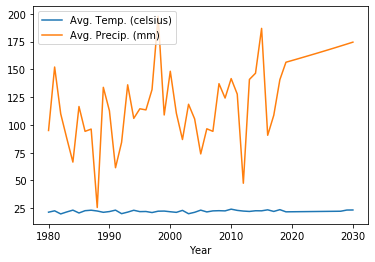

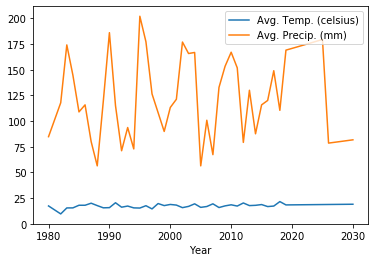

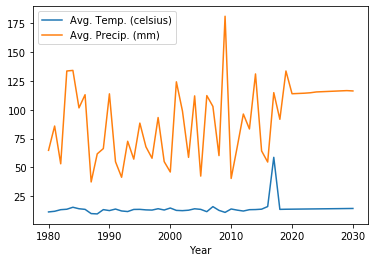

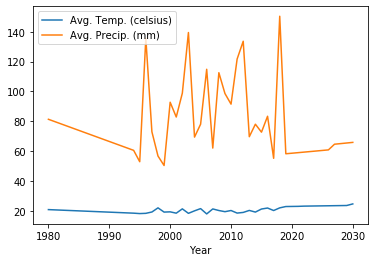

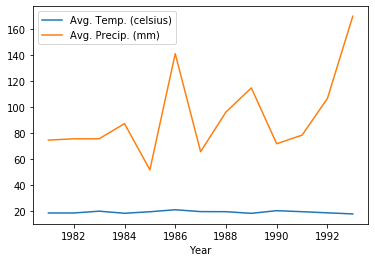

In [6]:
#temperature and precipitation data from april - october 
temps_precip = pd.read_excel("avg_temps_precip.xlsx")
temps_precip
#group the different months together in order of year
months = temps_precip.sort_values(['Year'],ascending=True).groupby('Month').plot(x='Year', kind='line')

In [7]:
climate_yearly = temps_precip.groupby('Year')
for key, item in climate_yearly:
    print(climate_yearly.get_group(key), "\n\n")

   Year      Month  Avg. Temp. (celsius)  Avg. Precip. (mm)
0  1980      April                 10.89              75.44
1  1980        May                 17.33              84.83
2  1980       June                 21.44              95.00
3  1980       July                 26.06              98.30
4  1980     August                 25.33             115.32
5  1980  September                 20.72              81.28
6  1980    October                 11.33              64.77 


    Year       Month  Avg. Temp. (celsius)  Avg. Precip. (mm)
7   1981        June                 22.67             152.15
8   1981       July                  24.22             143.51
9   1981     August                  22.39              92.46
10  1981  September                  18.39              74.42
11  1981     October                 11.89              85.85 


    Year       Month  Avg. Temp. (celsius)  Avg. Precip. (mm)
12  1982      April                   9.44              75.95
13  1982         M

In [8]:
#reading in test/train data 
all_data = pd.read_excel("all_data.xlsx")

np_all_data = all_data.to_numpy()
X = np_all_data[:278, :4] 
y = np_all_data[:278, 5:]

X_projected = np_all_data[278:, :4]

#simple multiple linear regression model 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,39.5,44.268557
1,38.0,39.662662
2,25.8,28.553960
3,27.5,29.702392
4,34.0,40.936649
5,36.2,38.941106
6,43.0,42.759198
7,44.0,44.782126
8,37.5,37.269173
9,43.0,42.738860


In [9]:
#grouped_df = all_data.sort_values('Month')
#grouped_df = grouped_df.reset_index()
#grouped_df = grouped_df.drop('index', axis=1)

#grouping df by month for calculations for data summary table 
grouped_df_april = grouped_df.iloc[:50]
grouped_df_may = grouped_df.iloc[51:100]
grouped_df_june = grouped_df.iloc[101:150]
grouped_df_july = grouped_df.iloc[151:200]
grouped_df_august = grouped_df.iloc[201:250]
grouped_df_september = grouped_df.iloc[251:300]
grouped_df_october = grouped_df.iloc[301:]

NameError: name 'grouped_df' is not defined

In [ ]:
print(grouped_df_october['Avg. Temp. (celsius)'].max())
print(grouped_df_october['Avg. Precip. (mm)'].max())

In [ ]:
#errors of simple multiple linear regression model
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

avg_mae = []
avg_mae.append(metrics.mean_absolute_error(y_test, y_pred))

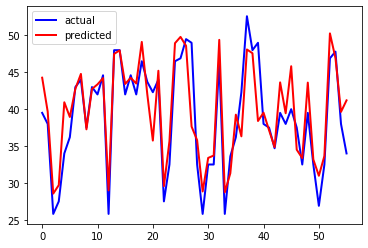

<Figure size 3600x1440 with 0 Axes>

In [10]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [37]:
#use model to make projections for next 10 years 
years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
y_projected = regressor.predict(X_projected)
y_projected = y_projected.flatten()
y_projected = y_projected[0::7]
simple_proj = pd.DataFrame({'Year': years, 'Model': 'Simple','Projected': y_projected})

#mann-whitney U test
stat, p = mannwhitneyu(y_projected, y_test.flatten()[:10])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
print(p)
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
6.1449809926208e-05
Different distribution (reject H0)


In [18]:
#ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01) 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,48.0,40.228946
1,32.5,32.596560
2,44.2,42.092443
3,38.0,39.438928
4,34.7,34.195930
5,42.0,42.958312
6,37.5,36.904910
7,42.3,35.972800
8,27.5,29.453215
9,42.3,35.916683


In [12]:
#errors for ridge regression
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
avg_mae.append(metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 26.302047345635035
Root Mean Squared Error: 5.128552168559372
Mean Absolute Error: 3.6728278204869427


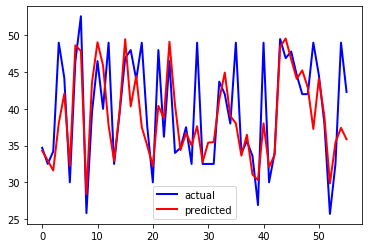

<Figure size 3600x1440 with 0 Axes>

In [13]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [36]:
#use ridge model to make projections for the next 10 years
y_projected = ridge.predict(X_projected)
y_projected = y_projected.flatten()
y_projected = y_projected[0::7]
ridge_proj = pd.DataFrame({'Year': years, 'Model': 'Ridge','Projected': y_projected})
stat, p = mannwhitneyu(y_projected, y_test.flatten()[:10])
print('Statistics=%.3f, p=%.3f' % (stat, p))
print(p)
#mann-whitney U test
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
6.1449809926208e-05
Different distribution (reject H0)


In [23]:
#lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
coeff_used = np.sum(lasso.coef_!=0)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#avg_mae.append(metrics.mean_absolute_error(y_test, y_pred))
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


Mean Squared Error: 10.097015404089174
Root Mean Squared Error: 3.1775801176507215
Mean Absolute Error: 2.402195125579678


,Actual,Predicted
0,32.5,35.760507
1,32.5,33.542914
2,44.6,46.479999
3,32.5,35.598531
4,46.5,49.053443
5,44.6,44.259868
6,39.5,40.021848
7,52.6,47.980896
8,34.2,31.995792
9,33.6,31.500435


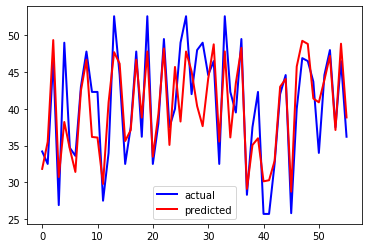

<Figure size 3600x1440 with 0 Axes>

In [16]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [47]:
#lasso model to project next 10 years
y_projected = lasso.predict(X_projected)
y_projected = y_projected.flatten()
y_projected = y_projected[0::7]
lasso_proj = pd.DataFrame({'Year': years, 'Model': 'LASSO', 'Projected': y_projected.flatten()})
lasso_proj

#Mann-Whitney U test
stat, p = mannwhitneyu(y_projected,y_test.flatten()[:10] )
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
print(p)
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
6.0517623873630704e-05
Different distribution (reject H0)


In [48]:
#ElasticNet 
from sklearn.linear_model import ElasticNet

In [45]:
enet = ElasticNet(alpha=0.25, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,44.6,44.273739
1,34.0,34.180918
2,25.8,29.115640
3,44.6,46.349354
4,44.0,44.622473
5,43.7,41.535264
6,44.6,44.284412
7,37.5,35.235063
8,28.3,29.437976
9,34.0,41.189953


In [20]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
avg_mae.append(metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 8.99890089717224
Root Mean Squared Error: 2.999816810602314
Mean Absolute Error: 2.1789542963949504


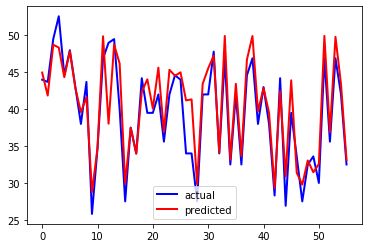

<Figure size 3600x1440 with 0 Axes>

In [21]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [46]:
y_projected = enet.predict(X_projected)
y_projected = y_projected.flatten()
y_projected = y_projected[0::7]
enet25_proj = pd.DataFrame({'Year': years, 'Model': 'ElasticNet 0.25', 'Projected': y_projected})
enet25_proj
stat, p = mannwhitneyu(y_projected, y_test.flatten()[:10])
print('Statistics=%.3f, p=%.3f' % (stat, p))
print(p)
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
6.0517623873630704e-05
Different distribution (reject H0)


In [38]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,48.0,40.465185
1,42.3,36.193739
2,27.5,29.703706
3,42.3,36.186612
4,40.0,45.853874
5,47.8,46.912150
6,25.8,28.643258
7,43.7,41.559326
8,48.0,40.494481
9,44.6,44.216292


In [39]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
avg_mae.append(metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 12.84460788477315
Root Mean Squared Error: 3.583937483379579
Mean Absolute Error: 2.645312382123931


NameError: name 'avg_mae' is not defined

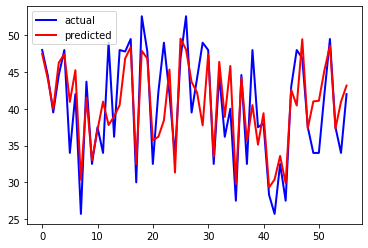

<Figure size 3600x1440 with 0 Axes>

In [25]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [40]:
y_projected = enet.predict(X_projected)
y_projected = y_projected.flatten()
y_projected = y_projected[0::7]
enet5_proj = pd.DataFrame({'Year' : years, 'Model': 'ElasticNet 0.5', 'Projected': y_projected})
enet5_proj
print(y_test.flatten().sort())
stat, p = mannwhitneyu(y_projected, y_test.flatten()[:10])
print(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

None
6.1449809926208e-05
Statistics=0.000, p=0.000
Different distribution (reject H0)


In [41]:
enet = ElasticNet(alpha=0.75, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,39.5,43.631548
1,38.0,39.733975
2,42.0,43.428555
3,40.0,46.038708
4,46.9,49.745494
5,43.0,42.628955
6,32.5,35.772561
7,44.2,42.125503
8,37.5,35.393998
9,44.0,45.015693


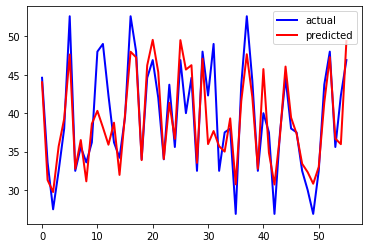

<Figure size 3600x1440 with 0 Axes>

In [28]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [29]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
avg_mae.append(metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 13.413974280915426
Root Mean Squared Error: 3.6625092874852108
Mean Absolute Error: 2.7373100022803767


In [43]:
y_projected = enet.predict(X_projected)
y_projected = y_projected.flatten()
y_projected = y_projected[0::7]
enet75_proj = pd.DataFrame({'Year': years, 'Model': 'ElasticNet 0.75', 'Projected': y_projected})
enet75_proj
stat, p = mannwhitneyu(y_projected,y_test.flatten()[:10] )
print(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

6.207723030081676e-05
Statistics=0.000, p=0.000
Different distribution (reject H0)


In [34]:
frames = [simple_proj, ridge_proj, lasso_proj, enet25_proj, enet5_proj, enet75_proj]
all_1results = pd.concat(frames)
all_1results['Projected'].var()
#all_1results.to_csv('phase1yields_new.csv', index=False)

2.961772366411446

In [32]:
#export df of errors for table
avg_mae_df = pd.DataFrame(avg_mae)
avg_mae_df.insert(0, 'Model', models)
avg_mae_df.columns = ['Model', 'Average Mean Absolute Error']
avg_mae_df.to_csv('avg_error_phase1.csv', index=False)

NameError: name 'models' is not defined

In [82]:
#export results for table 
all_1results_2030 = all_1results.loc[all_1results['Year'] == 2030]
all_1results_2030.to_csv('all_1results_2030.csv', index=False)

In [59]:
lst = [44, 42, 40, 44.6, 47.8, 48, 52.6, 49.5, 46.5, 46.9]
print(statistics.stdev(lst))

3.6773934005246462


In [62]:
#soy_yield
statistics.stdev(list(soy_yield['Soybean Yield (bushels/acre)']))

9.626283464210543